# Q6

In [10]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [11]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  diff_x = filter_size//2
  diff_y = filter_size//2
  image = np.pad(img, (diff_x, diff_y), mode="reflect")
  return image

In [12]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  kx, ky = filter_size//2, filter_size//2
  output = np.zeros_like(image, dtype=np.int32)
  for i in range(kx, output.shape[0]-kx):
    for j in range(ky, output.shape[1]-ky):
      output[i, j] = np.average(image[i-kx:i+kx, j-kx:j+kx])
  result = output[kx:output.shape[0]-kx, ky:output.shape[1]-ky]
  return result

In [13]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  kernel = np.array(
    [
      [1/9] * filter_size
    ] * filter_size
  , dtype=np.float64) 
  kx, ky = filter_size//2, filter_size//2
  output = np.zeros_like(image, dtype=np.int32)
  for i in range(kx, output.shape[0]-kx):
    for j in range(ky, output.shape[1]-ky):
      output[i, j] = np.median(image[i-kx:i+kx, j-kx:j+kx])
  result = output[kx:output.shape[0]-kx, ky:output.shape[1]-ky]
  return result

In [14]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    sigma = std
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i,j] = np.exp(-((i - filter_size // 2)**2 + (j - filter_size // 2)**2) / (2 * sigma**2))
    # Normalize the kernel
    kernel = kernel / np.sum(kernel)
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [15]:
# Do not change this cell
image = cv2.imread('images/taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

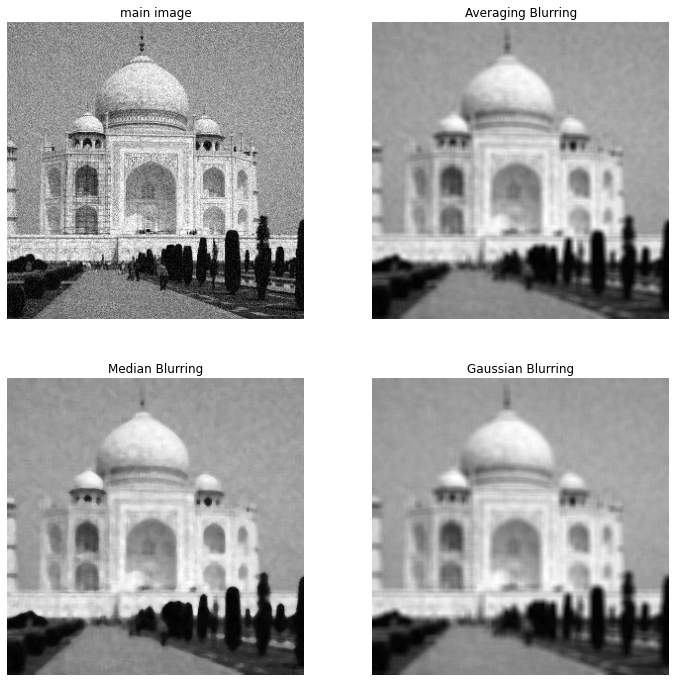

In [16]:
# Do not change this cell
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,7)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,7)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,7,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [17]:
def calculate_bilateral_kernel(image, i, j, filter_size, std, rstd):
    image = np.float64(image)
    k = filter_size // 2
    a = image[i-k:i+k+1, j-k:j+k+1] - image[i,j]
    w_r = np.square(image[i-k:i+k+1, j-k:j+k+1] - image[i,j]) / (2*rstd**2)
    w_r *= -1
    ik = np.arange(i-k, i+k+1)
    np.square(ik - i)
    jl = np.arange(j-k, j+k+1)
    m = (ik[:, np.newaxis] + jl[np.newaxis, :]).reshape((len(ik), len(ik)))
    m = m / (2*std**2)
    m *= -1
    return np.exp(m + w_r)

In [18]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

In [19]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    padded_img = Reflect101(img, filter_size)
    result = padded_img.copy()
    k = filter_size // 2
    for i in range(k, padded_img.shape[0]-k-1):
      for j in range(k, padded_img.shape[1]-k-1):
        kernel = calculate_bilateral_kernel(padded_img, i, j, filter_size, std, rstd)
        result[i,j] = np.sum(padded_img[i-k:i+k+1, j-k:j+k+1] * kernel) / np.sum(kernel)
    result = result[k:padded_img.shape[0]-k, k:padded_img.shape[1]-k]
    return result

In [20]:
a = np.arange(10)
b = np.arange(10,20)
a - b

array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10])

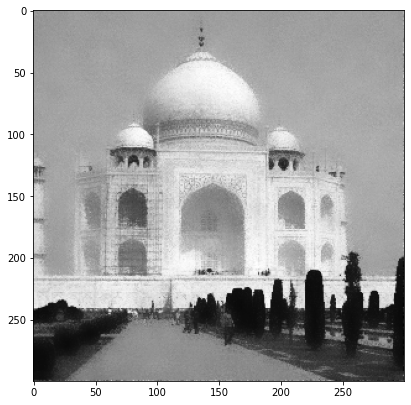

In [27]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
# plt.imshow(bilateral, cmap="gray")
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(bilateral,cmap='gray')

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [29]:
AveragingBlurring = cv2.blur(image, (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, (15,15), 40)
Bilateral = cv2.bilateralFilter(image, 15, 40, 40)

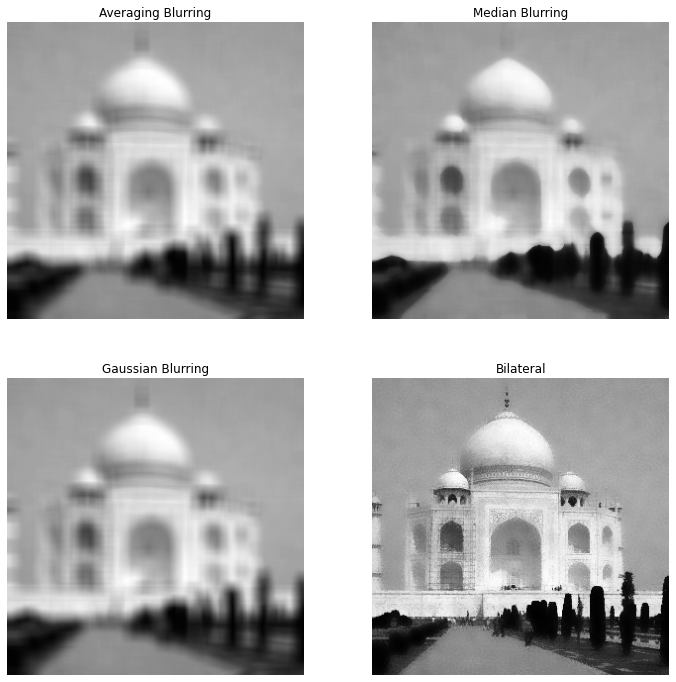

In [30]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(12,12))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")